# Telecom Churn Rate Prediction

### Purpose of the Notebook
**_To create a machine learning model to predict the telecom customers churning_**

## Step 1: Importing the libraries and data

In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [47]:
df = pd.read_csv("Telecom-Customer-Churn.csv")

## Step 2 : Exploring the dataset

##### 1. Data Observation

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

As per the observation, the datatype of **TotalCharges** column is set as Object but it needs to be changed to numeric.

In [48]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

The datatype of **TotalCharges** has been modified to **float64**.

##### 2. Checking for the null values 

In [7]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As per the observation, the Null value count is 11 and is very less as compared to the datset that we have. Therefore, it can be dropped. The same will be performed in the next step of data cleaning.

## Step 3: Cleaning the data

In [8]:
df.dropna(inplace = True)

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The data is now free from the Null Values.

## Step 4: Data Pre-processing

The target variable for us is **Churn**.
The **CustomerID** will not contribute to the **Churn** prediction rate therefore, we will exclude this column.

In [10]:
df2 = df.iloc[:,1:]

In [11]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The Target variable **'Churn'** is in Categorical form, let's convert it into numricals 1s and 0s.

In [104]:
df2['Churn'].replace('Yes', 1, inplace = True)
df2['Churn'].replace('No', 0, inplace = True)

In [13]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


There are lot of categorical variables and to utilize them, we need to apply one-hot encoding here so that they can be used for the model creation.

In [14]:
df3 = pd.get_dummies(df2)

In [15]:
df3.shape

(7032, 46)

### Step 5: Exploratory Data Analysis

Let's start with the Target Variable(**Churn**) 

In [53]:
churn = len(df2[df2['Churn']==1])
non_churn = len(df2[df2['Churn']==0])
total = len(df2)

percentageChurn = round(churn*100/total, 2)
percentageNonChurn = round(non_churn*100/total, 2)

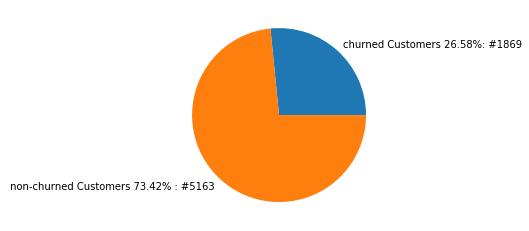

In [17]:
fig, ax = plt.subplots()
ax.pie(
    [churn, non_churn],
    labels=(
        f'churned Customers {percentageChurn}%: #{churn}',
        f' non-churned Customers {percentageNonChurn}% : #{non_churn}'
    ),
    startangle=0
)
plt.show()

We can clearly see that the non-churned customers are quite high than the number of churned customers. We can say that the dataset is skewed and we can expect a more number of predictions as non-churned.

Let's check for the correlation of the Target Variable **Churn** with other variables.

SeniorCitizen                              0.150541
tenure                                    -0.354049
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
Churn                                      1.000000
gender_Female                              0.008545
gender_Male                               -0.008545
Partner_No                                 0.149982
Partner_Yes                               -0.149982
Dependents_No                              0.163128
Dependents_Yes                            -0.163128
PhoneService_No                           -0.011691
PhoneService_Yes                           0.011691
MultipleLines_No                          -0.032654
MultipleLines_No phone service            -0.011691
MultipleLines_Yes                          0.040033
InternetService_DSL                       -0.124141
InternetService_Fiber optic                0.307463
InternetService_No                        -0.227578
OnlineSecuri

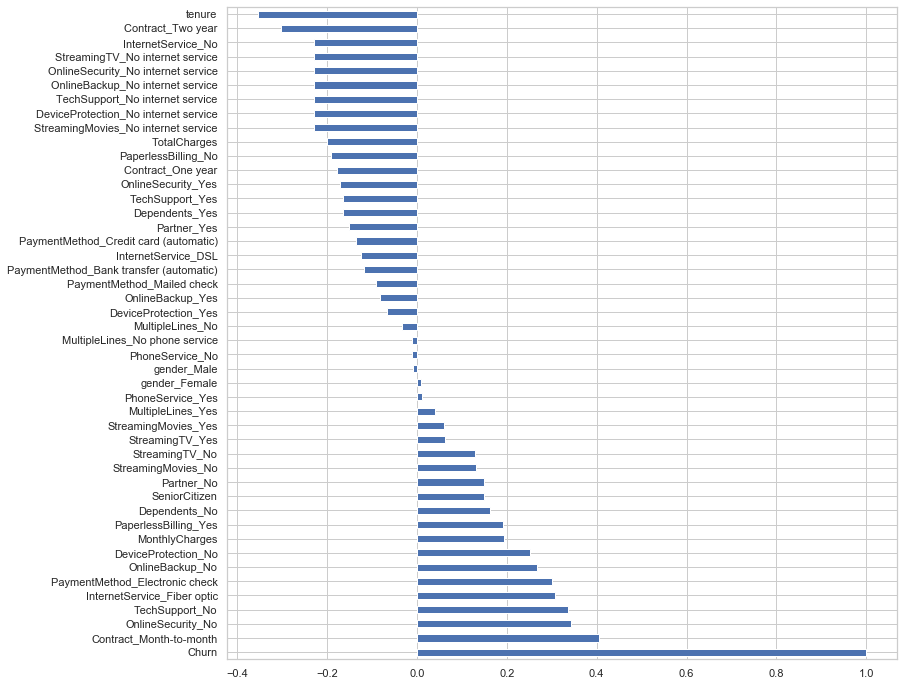

In [79]:
plt.figure(figsize= (12,12))
sns.set_style('whitegrid')
print(df3.corrwith(df3['Churn']))
df3.corrwith(df3['Churn']).sort_values(ascending = False).plot(kind='barh')

Let's explore the factors impacting the churning/non-churning of customers:
1. Tenure
2. Categorical Variables
3. MonthlyCharges & TotalCharges

1. **Tenure:** It has max correlation coefficient and thus is very important factor. Let us explore it in detail.

Text(0.5, 1.0, 'Tenure wise customer distribution')

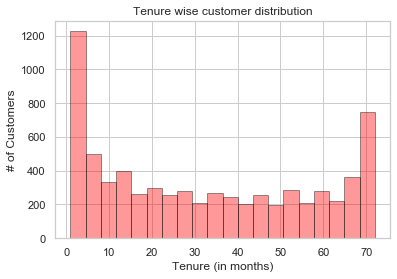

In [54]:
sns.set_style('whitegrid')

ax = sns.distplot(df2['tenure'], hist=True,
             bins=int(180/9), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5},kde=False)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (in months)')
ax.set_title('Tenure wise customer distribution')

The above graph clearly depicts that the number of customers with tenure less than 5 months i.e. a lot of new cutomers added recently. The company has also managed to retain a good number of customers with tenure around 5 years. Also, the data is not partially skewed aroudn corners and is evenly distributed in middle.

Let us analyze its impact on the Churning.

Text(0.5, 1.0, 'Tenure vs Churn')

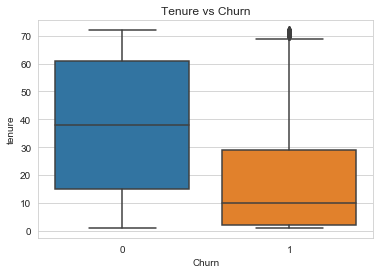

In [20]:
sns.boxplot(x = df2.Churn, y = df2.tenure).set_title('Tenure vs Churn')

The above plot clearly shows with increase in Tenure, churn rate decreases.Thus, it is an important factor for our prediction model.

**2. Categorical Variables**

Let us visualize the distribution of customers w.r.t. various categorical variables to understand in a better way.

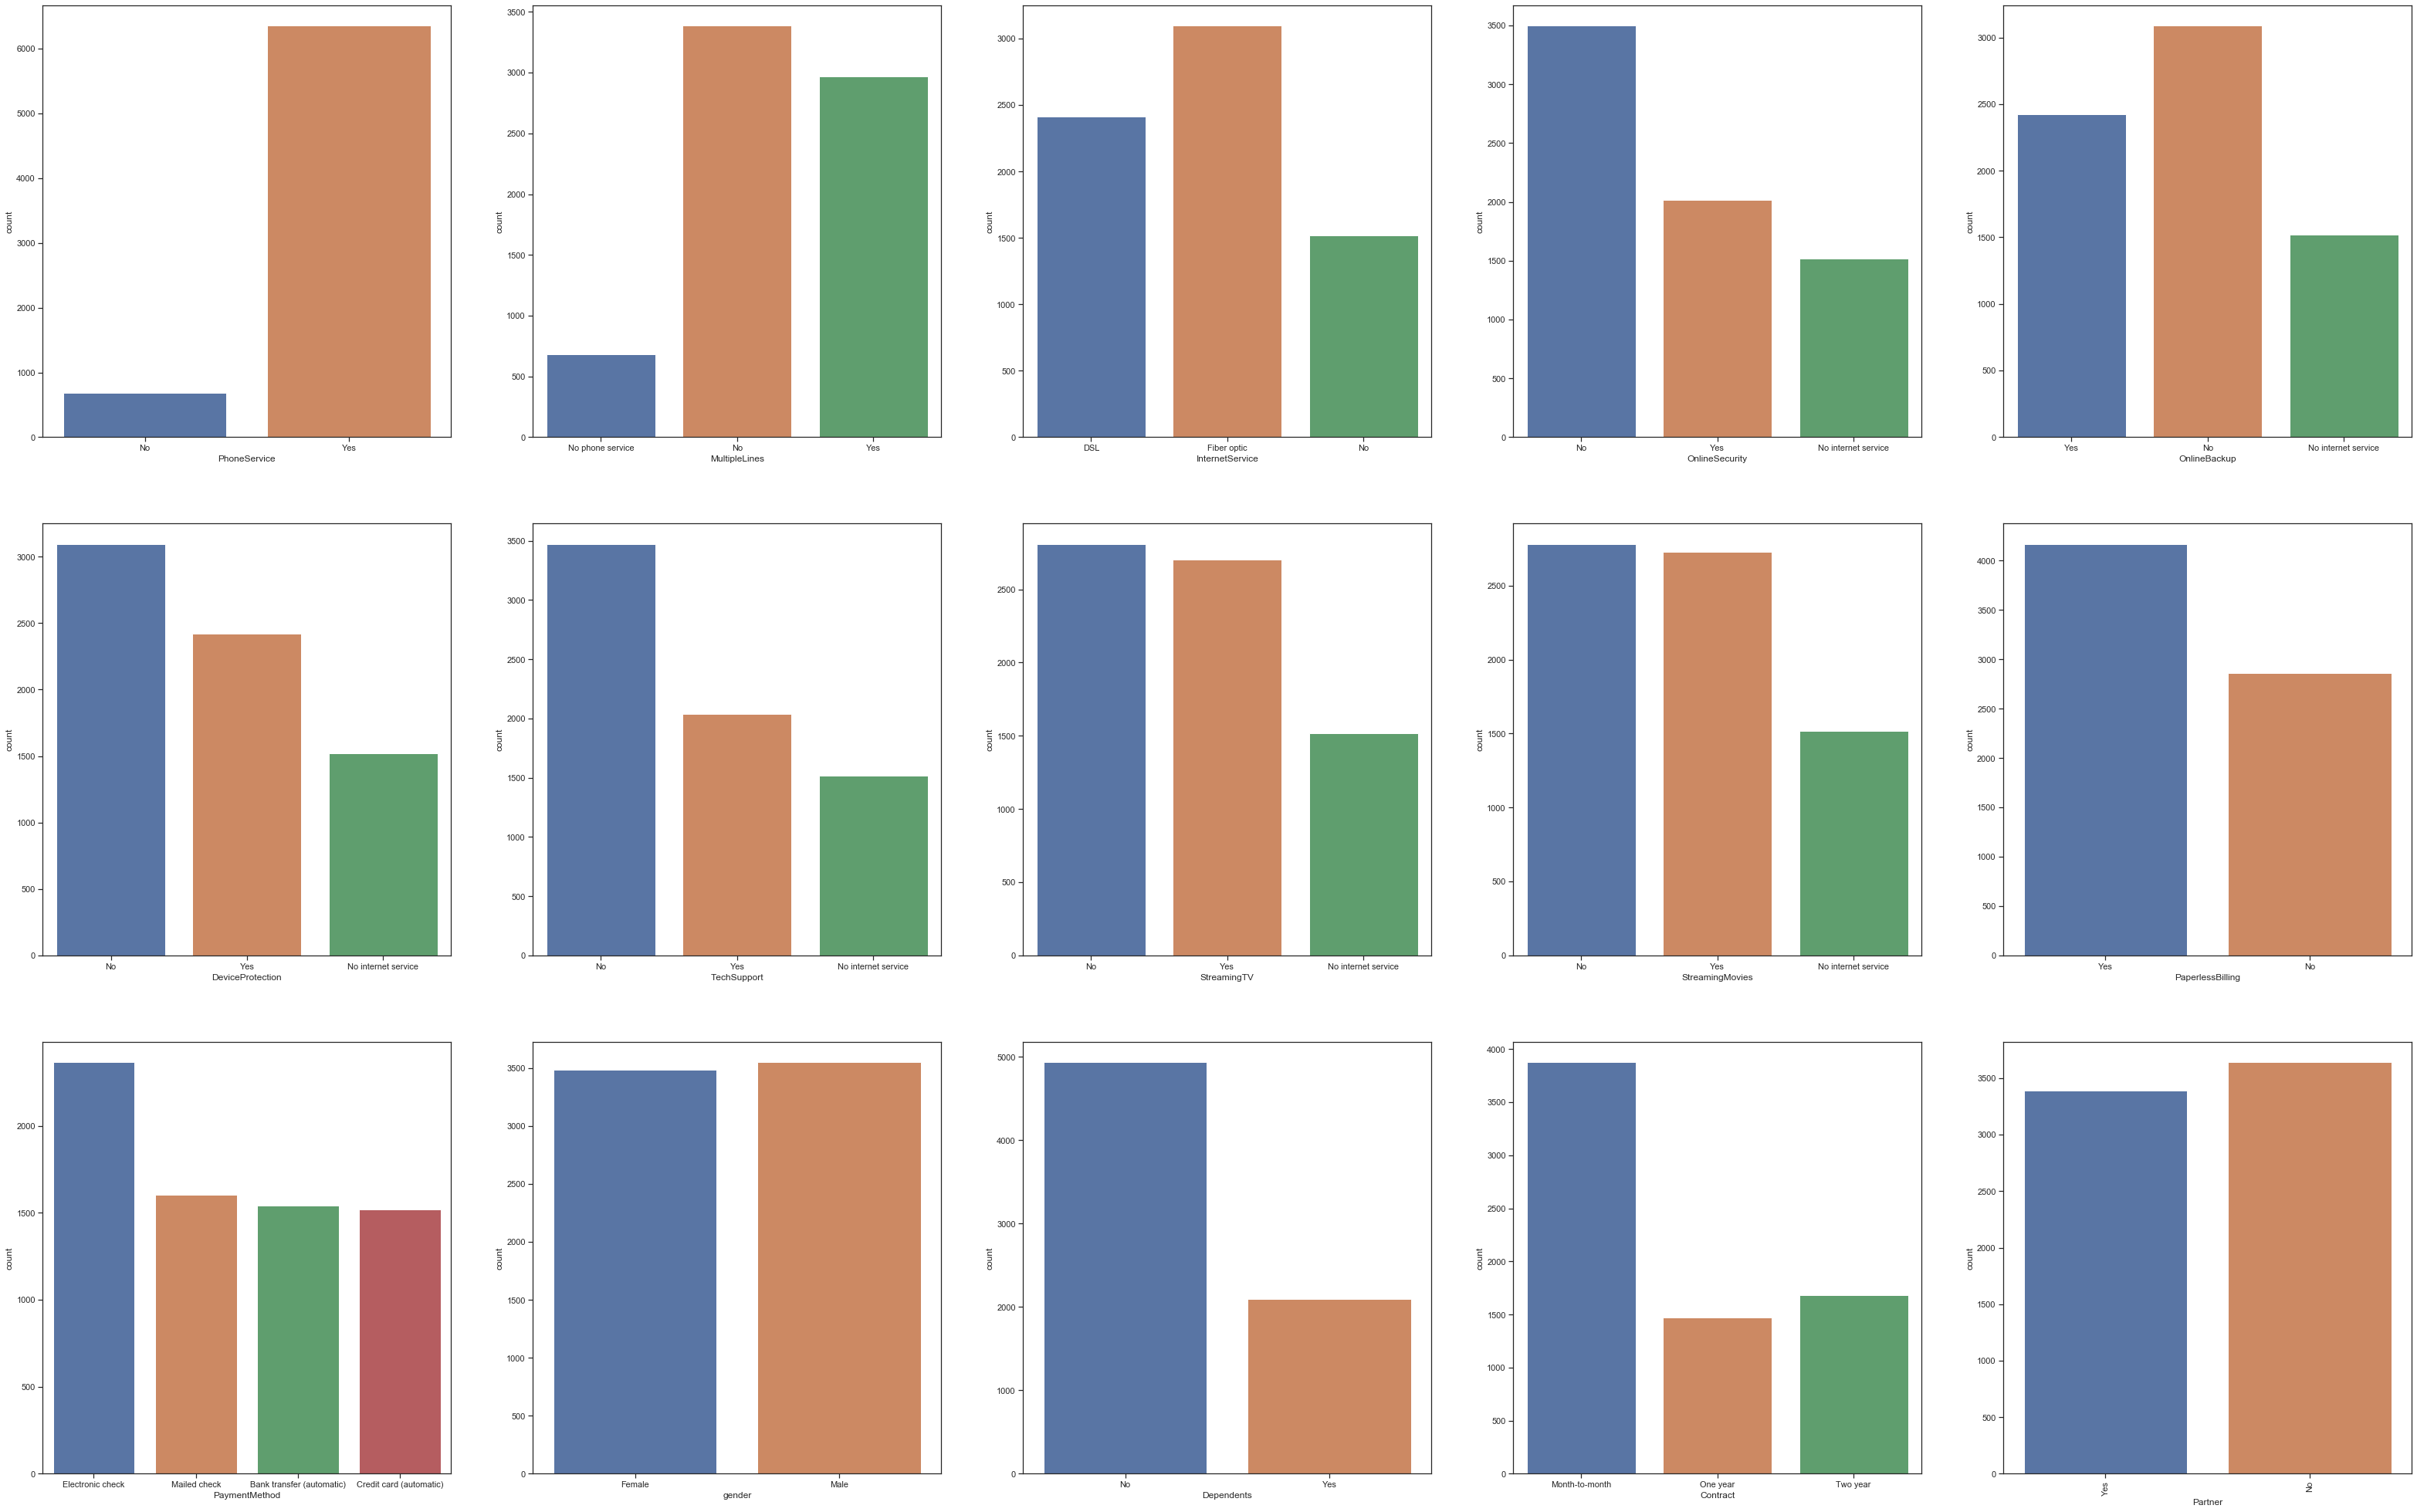

In [21]:
sns.set(style="ticks", color_codes=True)


fig, axes = plt.subplots(nrows = 3 ,ncols = 5,figsize = (55,35))

sns.countplot(x = "PhoneService", data = df, ax=axes[0][0])
sns.countplot(x = "MultipleLines", data = df, ax=axes[0][1])
sns.countplot(x = "InternetService", data = df, ax=axes[0][2])
sns.countplot(x = "OnlineSecurity", data = df, ax=axes[0][3])
sns.countplot(x = "OnlineBackup", data = df, ax=axes[0][4])
sns.countplot(x = "DeviceProtection", data = df, ax=axes[1][0])
sns.countplot(x = "TechSupport", data = df, ax=axes[1][1])
sns.countplot(x = "StreamingTV", data = df, ax=axes[1][2])
sns.countplot(x = "StreamingMovies", data = df, ax=axes[1][3])
sns.countplot(x = "PaperlessBilling", data = df, ax=axes[1][4])
sns.countplot(x = "PaymentMethod", data = df, ax=axes[2][0])
sns.countplot(x = "gender", data = df, ax=axes[2][1])
sns.countplot(x = "Dependents", data = df, ax=axes[2][2])
sns.countplot(x = "Contract", data = df, ax=axes[2][3])
ax = sns.countplot(x = "Partner", data = df, ax=axes[2][4])

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

##### Observations:

1. **Phone_Services**: As per the observation, most of the customers have opted for phone services. The data w.r.t. the customers opted for phone_services is highly skewed but since the correlation factor for the same is quite less so it won't be impacting our prediction results.

2. **Multiple_lines**: The dataset is skewed for this variable but since the correlation is quite less so it won't be impacting our prediction algorithm.

3. **ContractType** : The dtaaset is partially skewed for contract type and as per the correlation factor, it is quite high for this variable. Therefore let us explore this factor in detail in the next step.

4. **Dependents**: The dataset for this variable is also skewed and also has a high correlation coefficient, thus needs to be inspected separately.

5. The dataset consists of good variation along all the other categories and is good for model creation.

2.1. **Contract Type**

Let us explore the distribution of customers across various contract types.

Text(0.5, 1.0, 'Contract-Type vs Customer distribution')

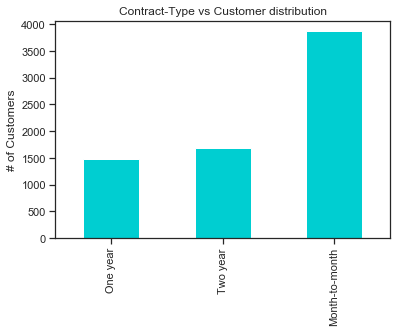

In [22]:
ax =df2['Contract'].value_counts().sort_values(ascending= True).plot(kind = 'bar', width = 0.5, color = 'darkturquoise')
ax.set_ylabel('# of Customers')
ax.set_title( 'Contract-Type vs Customer distribution')

The data is partially skewed and can be ignored and most importantly, it has a high correlation coeffient and thus is a strong factor for our prediction model.

Let us visually analyze its impact on churning.

Text(0.5, 1.0, 'Churn by Contract Type')

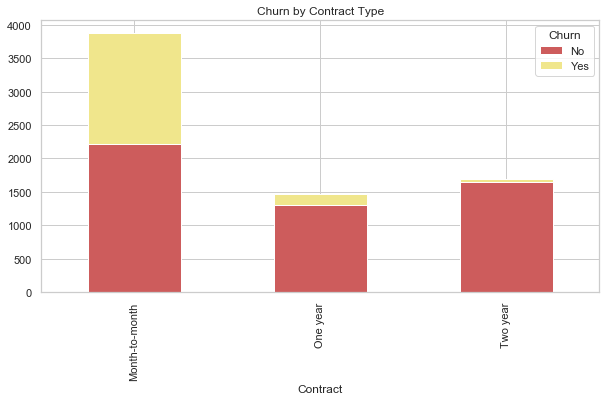

In [56]:
contract_churn = df.groupby(['Contract','Churn']).size().unstack()
colors = ["indianred", 'Khaki']
contract_churn.plot.bar(stacked = True, color= colors, figsize=(10,5))
plt.title("Churn by Contract Type")

The graph clearly represents that the Churning is more observed amongst the customers having Month-to-Month contract. This is an important factor for our model.

2.2. **Dependents**

Text(0.5, 1.0, 'Dependents vs Customer distribution')

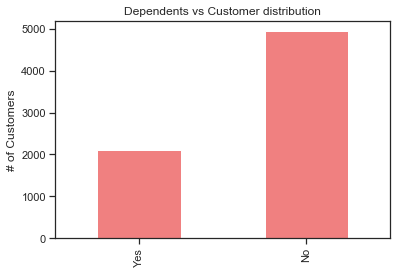

In [24]:
ax =df2['Dependents'].value_counts().sort_values(ascending= True).plot(kind = 'bar', width = 0.5, color = 'lightcoral')
ax.set_ylabel('# of Customers')
ax.set_title( 'Dependents vs Customer distribution')

Text(0.5, 1.0, 'Churn by Dependents')

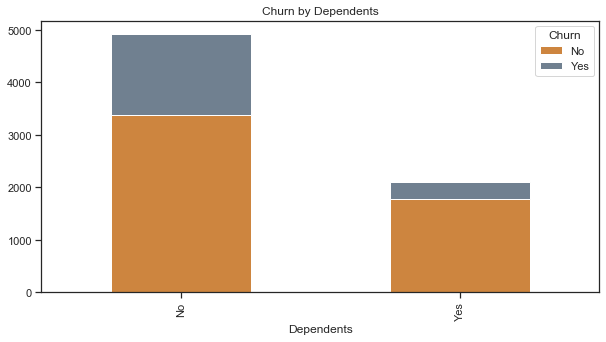

In [25]:
dependent_churn = df.groupby(['Dependents','Churn']).size().unstack()
colors = ["peru", 'Slategray']
dependent_churn.plot.bar(stacked = True, color= colors, figsize=(10,5))
plt.title("Churn by Dependents")

The data for dependent variable is partially skewed(ignorable). In the above graph clealry represents that the churning is more observed in customers with no dependents. Therefore, it is an important feature for our model.

**3. Total Charges and Monthly Charges.**

**3.1. TotalCharges**

Text(0.5, 1.0, 'Customer distribution w.r.t. Total Charges')

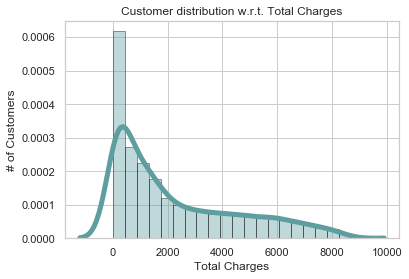

In [57]:
sns.set_style('whitegrid')

ax = sns.distplot(df2['TotalCharges'], hist=True,
             bins=int(180/9), color = 'cadetblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Total Charges')
ax.set_title('Customer distribution w.r.t. Total Charges')

Text(0.5, 1.0, 'Total Charges vs Churn')

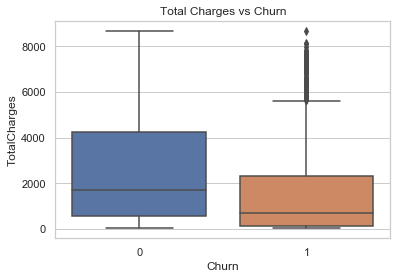

In [27]:
sns.boxplot(x = df2.Churn, y = df2.TotalCharges).set_title('Total Charges vs Churn')

The graph depicts that the churning is more observed in customers with less Total Charges.

**3.2. Monthly Charges**

Text(0.5, 1.0, 'Customer Distribution w.r.t. Monthly Charges')

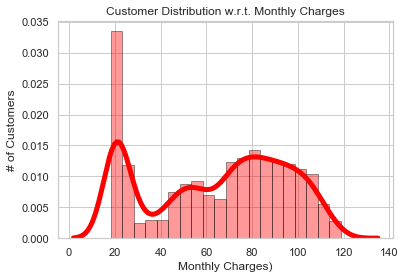

In [58]:
sns.set_style('whitegrid')

ax = sns.distplot(df2['MonthlyCharges'], hist=True,
             bins=int(180/9), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Monthly Charges)')
ax.set_title('Customer Distribution w.r.t. Monthly Charges')

This graph represents that the with increase in monthly charges, number of customers also drops. 

Let's observe the churning w.r.t. Monthly Charges

Text(0.5, 1.0, 'Monthly Charges vs Churn')

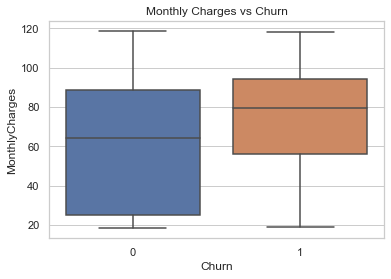

In [29]:
sns.boxplot(x = df2.Churn, y = df2.MonthlyCharges).set_title('Monthly Charges vs Churn')

The above graph shows that churning is more in customers paying more monthly charges. Thus, it is an important factor for our model.

### Step 6: Model Selection

The proble that we need to solve here is a classification problem. We have below options available with us for models for selection. Let us check and proceed further with the model creation and the model with the best accuracy will be best model for us.

1. Logistic Regression
2. Naive Bayes
3. Decision Trees
4. KNN
5. Random Forest

**6.1. Defining X(Indepedent Variable) and Y(Target Variable)**

In [30]:
X = df3.drop(columns = ['Churn'])
Y = df3['Churn'].values

**6.2. Scaling the data**

Although the difference in the data ranges is not that high in this dataset but scaling always helps in improving the accuracy of the model and thus I am preferring it over here as well.

In [59]:
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [60]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


The data has been scaled now and can be used for model creation.

**6.3. Let us define the train and test data. As per the general protocol we are taking 70:30 ratio over here as well.**

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


**1. Logistic Regression**

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
Ylr = lr.predict(X_test)

let us examine the model

In [62]:
from sklearn import metrics as mt

print (mt.accuracy_score(Y_test, Ylr))

0.8037914691943128


**2. Naive Bayes Model**

In [64]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
Ynb = nb.predict(X_test)

In [65]:
print (mt.accuracy_score(Y_test, Ynb))

0.7090047393364929


The accuracy of this model is quite lesser than logistics regression model.

**3. Decision Tree**

In [66]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, Y_train)

Ydt = dt.predict(X_test)

In [67]:
print (mt.accuracy_score(Y_test, Ydt))

0.7241706161137441


**4. KNN**

In [68]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
Yknn = knn.predict(X_test)

In [69]:
print (mt.accuracy_score(Y_test, Yknn))

0.7345971563981043


**5. Random Forest**

In [71]:
from sklearn.ensemble import RandomForestClassifier as rfc

rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 20)
rf.fit(X_train, Y_train)

Yrf = rf.predict(X_test)
print (metrics.accuracy_score(Y_test, Yrf))

0.7890995260663507


We can clearly see that Logistic Regression model and Random Forest has the highest accuracy amongst all the other algorithms.

Let us now validate it further using the ROC curve.

### Calculating AUC and visualizing ROC curves

#### 1. Logistic Regression Model

##### Calculating AUC

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score

In [97]:
Y_score_lr = lr.predict_proba(X_test)[:,1]

false_positive_rate_lr, true_positive_rate_lr, threshold_lr = roc_curve(Y_test, Y_score_lr)

print('roc_auc_score for Logistic Regression: ', roc_auc_score(Y_test, Y_score_lr))


roc_auc_score for Logistic Regression:  0.8463748027946811


##### Visualizing ROC Curve

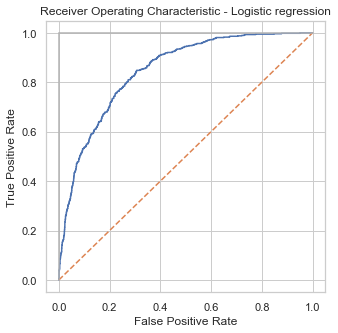

In [99]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate_lr, true_positive_rate_lr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### 2. Random Forest

##### Calculating AUC

In [100]:
Y_score_rf = rf.predict_proba(X_test)[:,1]

false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(Y_test, Y_score_rf)
print('roc_auc_score for Random Forest: ', roc_auc_score(Y_test, Y_score_rf))

roc_auc_score for Random Forest:  0.847420554428668


##### Visualizing ROC Curve

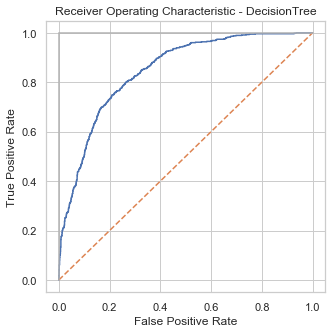

In [103]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate_rf, true_positive_rate_rf)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion:

We have logistic Regression Model with highest accuracy and AUC comparable to Random forest.
Therefore logistic Regression model is the model that is best suited for prediction.

### Thank You